# Support Vector Classifier Implementation

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# Lets create Synthetic datapoints
from sklearn.datasets import make_classification

In [167]:
# X,Y = make_classification(n_samples=800, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
X,Y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [168]:
data_df = pd.DataFrame(X, columns=['f1', 'f2'])
data_df.head()

,f1,f2
0,-0.819405,0.804046
1,-1.471575,2.556271
2,-0.481858,-0.940479
3,-0.869868,1.797397
4,-1.713683,-0.790685


### Apply SVC -  Scatter Plot for Feature 1 and Feature 2 Separated by Classes where we can apply **`SVC`**

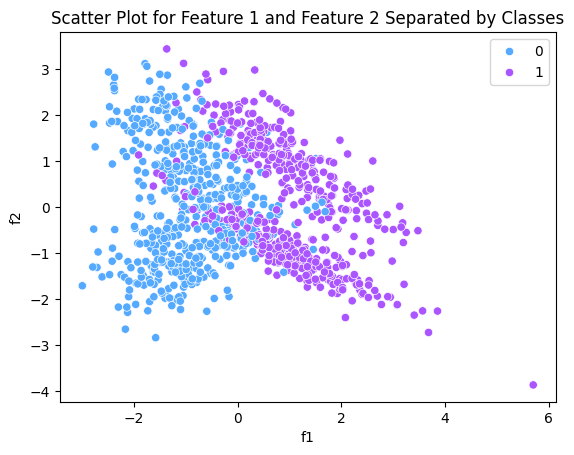

In [169]:
sns.scatterplot(x=data_df['f1'], y=data_df['f2'], hue=Y, palette='cool')
plt.title("Scatter Plot for Feature 1 and Feature 2 Separated by Classes")
plt.show()

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.30)

In [171]:
from sklearn.svm import SVC

In [172]:
# we know that it is linearly sperable by SVM so use "linear"
svc = SVC(kernel="linear")

In [173]:
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [174]:
y_pred = svc.predict(X_test)

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [176]:
score = accuracy_score(Y_test, y_pred)
print('Score: ',score)
print('Score in pcnt:', score * 100, '%')
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n',cm)
cr = classification_report(Y_test, y_pred)
print('Report:\n',cr)

Score:  0.8966666666666666
Score in pcnt: 89.66666666666666 %
Confusion Matrix: 
 [[137  12]
 [ 19 132]]
Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       149
           1       0.92      0.87      0.89       151

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



### If we have more number of clusters per class our data would not be linearly sperated and now if we use Linear Kernel paramter and we will get less Accuracy Score

In [177]:
X,Y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

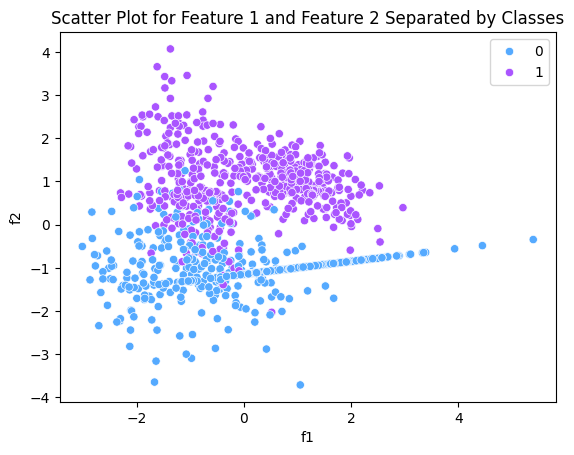

In [178]:
data_df = pd.DataFrame(X, columns=['f1', 'f2'])
data_df.head()

sns.scatterplot(x=data_df['f1'], y=data_df['f2'], hue=Y, palette='cool')
plt.title("Scatter Plot for Feature 1 and Feature 2 Separated by Classes")
plt.show()

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.30)

# No if we try to fit Linear SVC , then our accuracy will decrease in this case
svc = SVC(kernel="linear")
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)

# metrics
score = accuracy_score(Y_test, y_pred)
print('Score: ',score)
print('Score in pcnt:', score * 100, '%')
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n',cm)
cr = classification_report(Y_test, y_pred)
print('Report:\n',cr)

Score:  0.9433333333333334
Score in pcnt: 94.33333333333334 %
Confusion Matrix: 
 [[132   9]
 [  8 151]]
Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       141
           1       0.94      0.95      0.95       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### So for above kind of datapoints we can use **`rbf`** kernel, and our Accuracy will increase
#### So with kernel internally transformation happened with changing the features to higher dimensions and then applying SVM on the datapoints

In [180]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, Y_train)

SVC()

In [181]:
y_pred = rbf_svc.predict(X_test)

# metrics
score = accuracy_score(Y_test, y_pred)
print('Score: ',score)
print('Score in pcnt:', score * 100, '%')
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: \n',cm)
cr = classification_report(Y_test, y_pred)
print('Report:\n',cr)

Score:  0.9433333333333334
Score in pcnt: 94.33333333333334 %
Confusion Matrix: 
 [[132   9]
 [  8 151]]
Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       141
           1       0.94      0.95      0.95       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### We can also use kernel as `poly` and `sigmoid` and check our performance metrics and then decide which kind of kernels we can use on these kind of datsets.

## Hyperparamter Tuning with SVC- We can use hyperparamter for SVC and see if we can imporve our accuracy and get a more generalized model

### Hyperparemters in SVC
### `gamma` and `refit` in `GridSearchCV` for SVC:

---

#### **1. `gamma` Parameter in SVC**:
- **What It Controls:**
  - `gamma` is a parameter for the **Gaussian Kernel (RBF)** and other kernel functions. 
  - It determines how far the influence of a single training example extends in the feature space.
  
- **Low `gamma`:**
  - The model considers points farther away from each other for decision boundaries.
  - The decision surface is **smoother** and more generalized.
  
- **High `gamma`:**
  - Each point in the dataset has more influence.
  - The model creates a more **complex decision boundary**, which may lead to overfitting.

---

#### **2. `refit` Parameter in GridSearchCV**:
- **What It Does:**
  - If `refit=True`, `GridSearchCV` will:
    1. Perform a full re-training of the model using the **best combination of hyperparameters** found during the search.
    2. Make it the final model you can use for predictions.

- **Why Use It:**
  - After identifying the optimal hyperparameters (e.g., the best `C`, `gamma`, and `kernel`), you want to train the model one more time with the best settings.
  - This ensures that the model you use for prediction leverages the best-found hyperparameter configuration.

- **Set to `False`:**
  - The model is **not re-trained** after the best parameters are found. 
  - You can access the best parameters via `grid_svc.best_params_` and manually train a new model if needed, though this is less convenient.


In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
model_svc = SVC()
param_grid = {'C':[0.1, 1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['rbf', 'sigmoid']
             }

In [184]:
grid_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid, verbose=3, cv=5, refit=True)

In [185]:
grid_svc.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.793 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.757 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.829 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.793 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [186]:
grid_svc.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [187]:
grid_svc.best_score_

np.float64(0.9342857142857144)

In [188]:
y_pred = grid_svc.predict(X_test)

In [189]:
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(Y_test, y_pred))
print('Report: ', classification_report(Y_test, y_pred))

Accuracy:  0.9433333333333334
Confusion Matrix:  [[132   9]
 [  8 151]]
Report:                precision    recall  f1-score   support

           0       0.94      0.94      0.94       141
           1       0.94      0.95      0.95       159

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

